# Import bibliotek

In [12]:
import os
import pandas as pd

In [2]:
!pip install tensorflow

In [14]:
from platform import python_version
python_version()

'3.10.12'

# Przygotowanie danych do analizy

In [15]:
from pandas.core.indexes import base
os.getcwd()
# base_data = pd.read_csv("/content/suml/DSP_4.csv")

# Google Colab
from google.colab import drive
drive.mount("/content/drive")

os.chdir("/content/drive/MyDrive/Colab Notebooks/suml/datasets/")
base_data = pd.read_csv("DSP_4.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
base_data

,objawy;wiek;choroby;wzrost;leki
0,1;;0;170;2
1,1;65;0;;3
2,1;55;0;182;4
3,1;44;0;187;3
4,1;77;0;165;2
5,1;64;0;164;1
6,1;54;1;178;4
7,1;;1;190;3
8,3;76;1;200;2
9,3;54;0;198;1


In [17]:
df = pd.read_csv("DSP_4.csv", sep=";")
print(df)

    objawy  wiek  choroby  wzrost  leki
0        1   NaN        0   170.0     2
1        1  65.0        0     NaN     3
2        1  55.0        0   182.0     4
3        1  44.0        0   187.0     3
4        1  77.0        0   165.0     2
5        1  64.0        0   164.0     1
6        1  54.0        1   178.0     4
7        1   NaN        1   190.0     3
8        3  76.0        1   200.0     2
9        3  54.0        0   198.0     1
10       3  56.0        0   187.0     2
11       3  68.0        0   167.0     3
12       3   NaN        1   168.0     2
13       3  55.0        1   189.0     1
14       3  44.0        1   177.0     2
15       3  43.0        1   166.0     3
16       2  32.0        1   188.0     4
17       2  23.0        1   198.0     3
18       2  42.0        0   176.0     2
19       2   NaN        0   167.0     1
20       2  11.0        0   159.0     2
21       2  21.0        0   198.0     3
22       2  34.0        1   192.0     4
23       2  32.0        1     NaN     1


In [18]:
df.columns

Index(['objawy', 'wiek', 'choroby', 'wzrost', 'leki'], dtype='object')

In [19]:
df.isnull().any()

objawy     False
wiek        True
choroby    False
wzrost      True
leki       False
dtype: bool

In [20]:
print(df["wiek"].mean())
print(df["wzrost"].mean())


44.163636363636364
183.34545454545454


In [21]:
df_2 = df.fillna(df.mean())

In [22]:
display(df_2)

,objawy,wiek,choroby,wzrost,leki
0,1,44.163636,0,170.000000,2
1,1,65.000000,0,183.345455,3
2,1,55.000000,0,182.000000,4
3,1,44.000000,0,187.000000,3
4,1,77.000000,0,165.000000,2
5,1,64.000000,0,164.000000,1
6,1,54.000000,1,178.000000,4
7,1,44.163636,1,190.000000,3
8,3,76.000000,1,200.000000,2
9,3,54.000000,0,198.000000,1


In [23]:
df_2.isnull().any()

objawy     False
wiek       False
choroby    False
wzrost     False
leki       False
dtype: bool

# Podstawowe statystyki opisowe

In [24]:
print(df["wiek"].mean())
print(round(df["wiek"].mean(), 2))
print(df["wiek"].median())
print(df["wiek"].max())
print(df["wiek"].min())
print(df["wiek"].var())


44.163636363636364
44.16
43.0
77.0
11.0
341.9171717171717


In [25]:
df["wiek"].max() - df["wiek"].min()

66.0

In [26]:
df["wiek"].quantile([.25, .5, .75])

0.25    32.0
0.50    43.0
0.75    55.5
Name: wiek, dtype: float64

In [27]:
round(df["wiek"].std(), 2)

18.49

In [28]:
round(df.describe(), 2)

,objawy,wiek,choroby,wzrost,leki
count,60.00,55.00,60.00,55.00,60.00
mean,2.53,44.16,1.42,183.35,2.50
std,1.29,18.49,1.62,12.56,1.03
min,1.00,11.00,0.00,159.00,1.00
25%,2.00,32.00,0.00,169.00,2.00
50%,2.00,43.00,1.00,187.00,2.50
75%,4.00,55.50,2.00,194.00,3.00
max,5.00,77.00,5.00,200.00,4.00


In [29]:
df["wiek"].groupby(df["objawy"]).describe()

,count,mean,std,min,25%,50%,75%,max
objawy,,,,,,,,
1,12.0,60.916667,10.858246,44.0,54.75,64.0,65.50,77.0
2,20.0,28.200000,9.817278,11.0,21.00,32.0,34.00,42.0
3,7.0,56.571429,11.970201,43.0,49.00,55.0,62.00,76.0
4,10.0,56.000000,13.944334,34.0,46.50,54.5,65.00,76.0
5,6.0,29.666667,10.211105,12.0,26.75,32.5,33.75,42.0


# Wizualizacja danych

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

In [31]:
df.corr()

,objawy,wiek,choroby,wzrost,leki
objawy,1.000000,-0.105504,0.110512,0.167664,-0.050666
wiek,-0.105504,1.000000,0.389564,-0.291871,-0.228091
choroby,0.110512,0.389564,1.000000,0.112124,0.045600
wzrost,0.167664,-0.291871,0.112124,1.000000,0.011842
leki,-0.050666,-0.228091,0.045600,0.011842,1.000000


<Axes: >

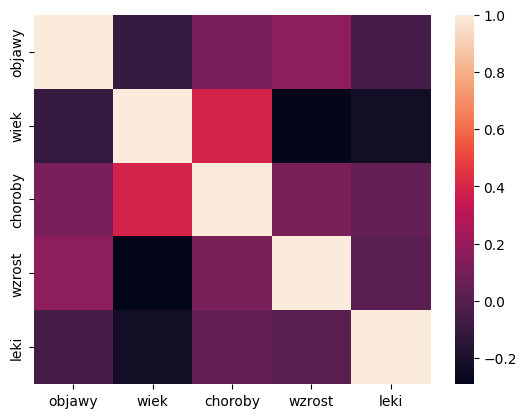

In [32]:
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Analiza korelacji')

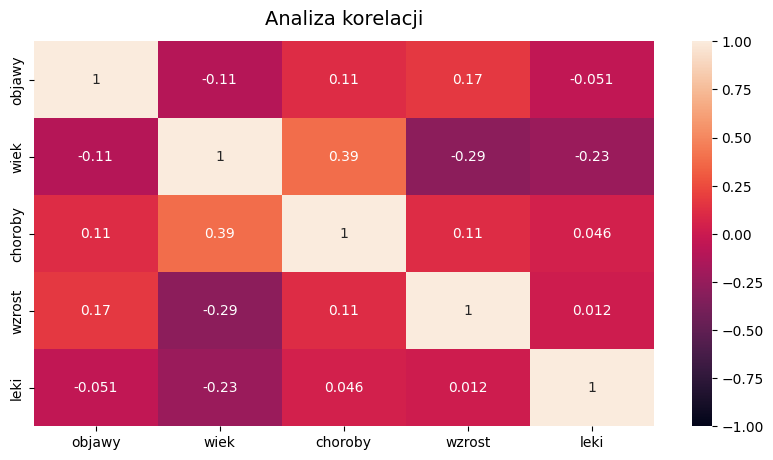

In [33]:
from seaborn.matrix import heatmap
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title("Analiza korelacji", fontdict={"fontsize":14}, pad=12)

# Zadania


## Zadanie 1

Print nie jest jedyną metodą pozwalającą na wyświetlenie danych. Spróbuj wyświetlić dane ze zmiennej df z wykorzystaniem display z biblioteki pandas.

In [34]:
pd.set_option("display.max_rows", 5)
pd.set_option("display.min_rows" , 1)
pd.set_option("display.max_columns", 2)
pd.set_option("display.width", 20)
display(df)

,objawy,...,leki
0,1,...,2
1,1,...,3
2,1,...,4
3,1,...,3
4,1,...,2


## Zadanie 2
Wypróbuj dwa inne sposoby na wypełnienie brakujących wartości. Wypełnij wszystkie brakujące wartości medianą i zapisz dataframe jako df_3. Wyświetl pod tabelą informację o medianie dla zmiennej wieku oraz wzrostu. Wypełnij wszystkie brakujące wartości jako 0 i zapisz dataframe jako df_4.

In [35]:
# Wypełnienie brakujących wartości medianą
df_3 = df.fillna(df.median())

# Wyświetlenie mediany dla zmiennej wieku oraz wzrostu
print("Mediana wieku:", df_3["wiek"].median())
print("Mediana wzrostu:", df_3["wzrost"].median())

# Wyświetlenie DataFrame df_3
display(df_3)

Mediana wieku: 43.0
Mediana wzrostu: 187.0


,objawy,...,leki
0,1,...,2
1,1,...,3
2,1,...,4
3,1,...,3
4,1,...,2


Wypełniam wartości brakujących zerami za pomocą metody `fillna()` z argumentem `value=0`

In [37]:
# Wypełnienie brakujących wartości jako 0
df_4 = df.fillna(0)

# Wyświetlenie DataFrame df_4
display(df_4)

,objawy,...,leki
0,1,...,2
1,1,...,3
2,1,...,4
3,1,...,3
4,1,...,2


## Zadanie 3
Przełóż zdobytą wiedzę, żeby dokonać podstawowej eksploracji nowego zestawu danych. Wczytaj dane DSP_5.csv pamiętając o właściwym określeniu separatora. Sprawdź czy są brakujące dane -jeżeli są, to wypełnij je średnią. Przedstaw średnią, wariancję i rozstęp dla zmiennej "hp". Przedstaw tabelę korelacji dla zmiennych. Czy są jakieś wartości, które szczególnie zwracają uwagę?

In [40]:
# Wczytuje dane
df = pd.read_csv("DSP_5.csv", sep=";")

# Sprawdzam czy są puste dane
print(df.isnull().sum())

# Wypełniam braki średnią
df = df.fillna(df.mean())

# Srednia, wariancja i rozstep dla `hp`
print("Średnia:", df["hp"].mean())
print("Wariancja:", df["hp"].var())
print("Rozstęp:", df["hp"].max() - df["hp"].min())

display(df.corr())

model    0
        ..
Length: 12, dtype: int64
Średnia: 143.51612903225805
Wariancja: 4379.023933402706
Rozstęp: 283.0


<ipython-input-40-2b0d647c302a>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())
<ipython-input-40-2b0d647c302a>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr())


,mpg,...,carb
mpg,1.000000,...,-0.550925
cyl,-0.852162,...,0.526988
disp,-0.847551,...,0.394977
hp,-0.748447,...,0.740507
drat,0.681172,...,-0.090790


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['mpg'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['cyl'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['disp'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['hp'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_4, *['mpg', 'cyl'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_5, *['cyl', 'disp'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_6, *['disp', 'hp'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_7, *['hp', 'drat'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['mpg'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['cyl'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['disp'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['hp'], **{})
chart

Wartości wahają się między -1 a 1, gdzie -1 to silna ujemna korelacja, 0 to brak, a 1 silna dodatnia korelacja.


1.   mpg i hp mają silną ujemną korelację, co oznacza, że samochody o wyższej mocy mają zazwyczaj niższe spalanie
2.   hp i wt mają silną dodatnią korelację, co oznacza, że samochody o wyższej mocy są zazwyczaj cięższe
3. qsec i vs mają silną dodatnią korelację, co oznacza, że samochody o lepszym przyspieszeniu mają zazwyczaj wyższą prędkość maksymalną
4. am i gear mają silną dodatnią korelację, co oznacza, że samochody z automatyczną skrzynią biegów mają zazwyczaj więcej biegów



## Zadanie 4
1. Wczytaj dane „DSP_8.csv”. Jest to zbiór danych Heart Attack Analysis & Prediction Dataset (aut. Rashik Rahman) dostępny w Kaggle. Zadbaj o odpowiednie formatowanie liczb dziesiętnych.

2. Napisz kod, który zwróci informację dotyczącą:

a) liczby kolumn (wraz z ich nazwami),
b) liczby wierszy (obserwacji),
c) ewentualnych braków danych,
d) średniego wieku oraz odchylenia standardowego w grupie kobiet oraz w grupie mężczyzn,
e) odsetka mężczyzn w zbiorze danych,
f) liczby kobiet w wieku od 45 do 50 lat,
g) korelacji pomiędzy zmiennymi, ale wyłącznie dla osób, dla których w zbiorze danych określono, że ich EKG w czasie spoczynku jest w normie (czyli w kolumnie RestingECG występuje obserwacja „Normal”).


In [41]:
df = pd.read_csv("DSP_8.csv", sep=",", decimal=".")

df = df.astype({
    "Age": float,
    "ChestPainType": object,
    "RestingBP": float,
    "Cholesterol": float,
    "FastingBS": object,
    "RestingECG": object,
    "MaxHR": float,
    "ExerciseAngina": object,
    "Oldpeak": float,
    "ST_Slope": object,
    "HeartDisease": object
})

In [47]:
print("Liczba kolumn:", len(df.columns))
print("Nazwy kolumn:", df.columns)

# Liczba wierszy (obserwacji)
print('\n' + "Liczba wierszy:", len(df))

# Braki danych
print('\n' + "Liczba braków danych:", df.isnull().sum().sum())

# Średni wiek i odchylenie standardowe mezczyzn i kobiet
print('\n' + "Średni wiek kobiet:", df[df["Sex"] == "Female"]["Age"].mean())
print("Odchylenie standardowe wieku kobiet:", df[df["Sex"] == "Female"]["Age"].std())
print("Średni wiek mężczyzn:", df[df["Sex"] == "Male"]["Age"].mean())
print("Odchylenie standardowe wieku mężczyzn:", df[df["Sex"] == "Male"]["Age"].std())

# Odsetek mężczyzn w zbiorze danych
print('\n' + "Odsetek mężczyzn:", (df["Sex"] == "Male").sum() / len(df) * 100)

# Liczba kobiet w wieku od 45 do 50 lat
print('\n' + "Liczba kobiet w wieku od 45 do 50 lat:", df[(df["Age"] >= 45) & (df["Age"] <= 50) & (df["Sex"] == "Female")].shape[0])

# Korelacja pomiędzy zmiennymi, ale wyłącznie dla osób, dla których w zbiorze danych określono, że ich EKG w czasie spoczynku jest w normie
print('\n' + "Korelacja pomiędzy zmiennymi:")
display(df[df["RestingECG"] == "Normal"].corr())


Liczba kolumn: 12
Nazwy kolumn: Index(['Age',
       'Sex',
       'ChestPainType',
       'RestingBP',
       'Cholesterol',
       'FastingBS',
       'RestingECG',
       'MaxHR',
       'ExerciseAngina',
       'Oldpeak',
       'ST_Slope',
       'HeartDisease'],
      dtype='object')

Liczba wierszy: 918

Liczba braków danych: 0

Średni wiek kobiet: nan
Odchylenie standardowe wieku kobiet: nan
Średni wiek mężczyzn: nan
Odchylenie standardowe wieku mężczyzn: nan

Odsetek mężczyzn: 0.0

Liczba kobiet w wieku od 45 do 50 lat: 0

Korelacja pomiędzy zmiennymi:


<ipython-input-47-14e95164aadb>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df[df["RestingECG"] == "Normal"].corr())


,Age,...,Oldpeak
Age,1.000000,...,0.246627
RestingBP,0.230469,...,0.120313
Cholesterol,-0.129005,...,0.028653
MaxHR,-0.380244,...,-0.195590
Oldpeak,0.246627,...,1.000000
